# Predicting Treadmill purchases based on Cardio habits and Customer demographics

This dataset includes details about customers who purchased different models of a treadmill from a sports company. We may be able to use this information to identify clusters of customers with different purchasing habits. The original dataset can be found [here](https://www.kaggle.com/saurav9786/cardiogoodfitness).

The dataset features the following columns:
- Product (treadmill model)
- Age of purchaser
- Gender " "
- Education " "
- Marital Status " "
- Usage - number of miles purchaser expects to cover per week
- Fitness - self-rated fitness level from 1 to 5

Import libraries for dataframe manipulation and graphing.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data
Read the 'CardioGoodFitness.csv' file into a dataframe.

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

Check the head of the dataframe.

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Check column data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Create a dataframe where any nulls are reported.

In [5]:
mask = False
for col in df.columns: 
    mask = mask | df[col].isnull()
dfnulls = df[mask]

Check there are no null values

In [6]:
dfnulls

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Find any rows that have been duplicated

In [7]:
duplicateRowsDF = df[df.duplicated()]

In [8]:
duplicateRowsDF

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Count the number of unique products

In [9]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Use seaborn on the dataframe to create a pairplot with the hue indicated by the Product column.

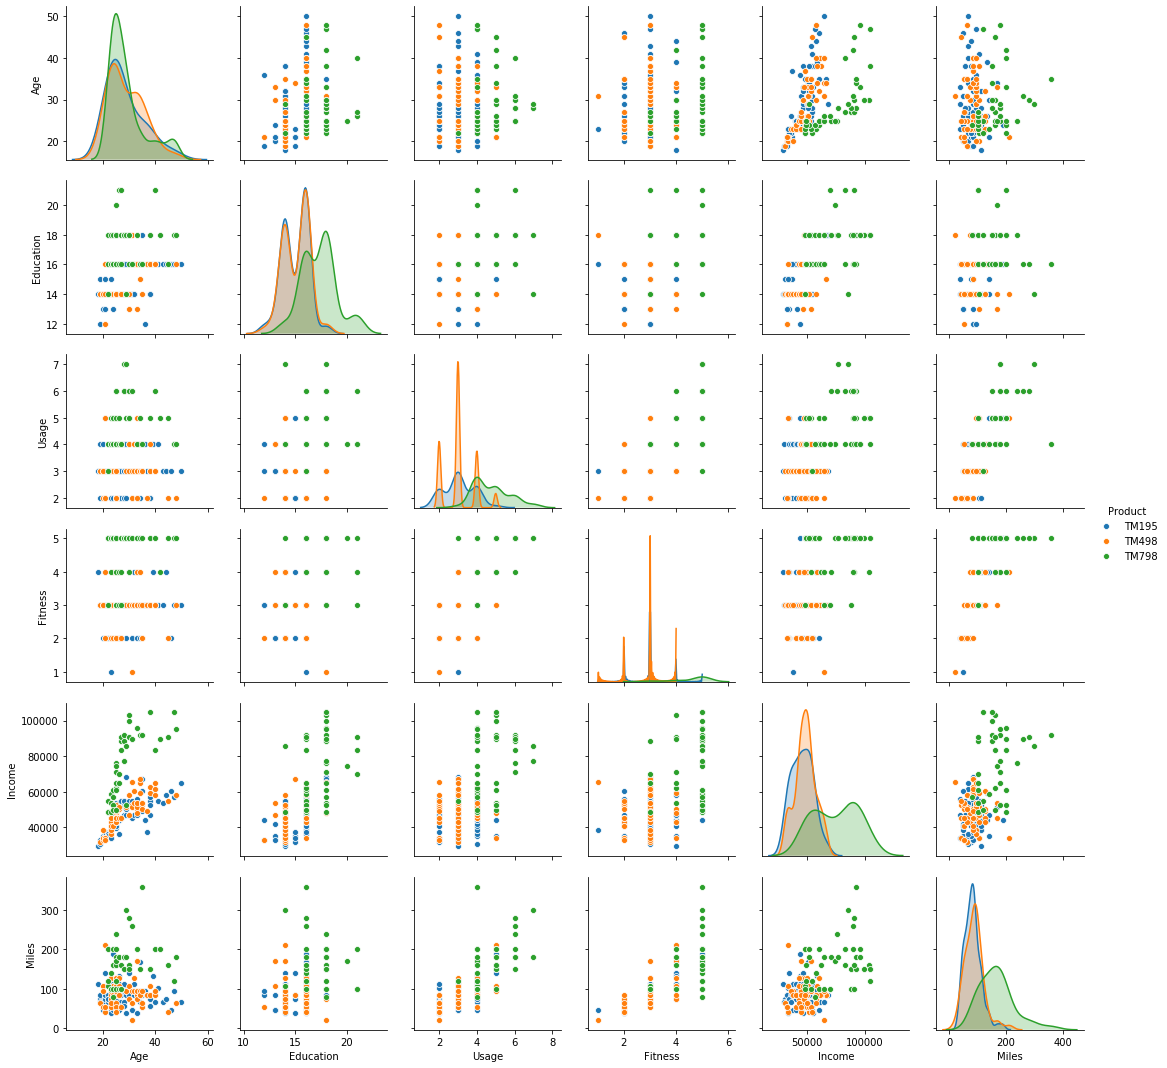

In [11]:
sns.pairplot(data=df,hue='Product')

# Change categorical string variables to numerical variable

Transform Gender and Marital Status into categorical variables types.

In [12]:
df['Gender'] = df['Gender'].astype('category')

In [13]:
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

Plot the expected mileage of from each model, organised by Gender.

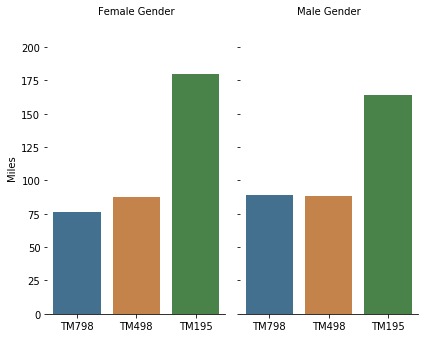

In [14]:
g = sns.catplot(x="Product", y="Miles", col="Gender",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Miles")
  .set_xticklabels(["TM798", "TM498","TM195"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 220))
  .despine(left=True))

Create a new variable with just the categorical columns.

In [15]:
categorical_columns = df.select_dtypes(['category']).columns

In [16]:
categorical_columns

Index(['Gender', 'MaritalStatus'], dtype='object')

Now transform the categorical columns into numerical variables. This will help with clustering customers together.

In [17]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)

In [18]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,1,14,1,3,4,29562,112
1,TM195,19,1,15,1,2,3,31836,75
2,TM195,19,0,14,0,4,3,30699,66
3,TM195,19,1,12,1,3,3,32973,85
4,TM195,20,1,13,0,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,1,21,1,6,5,83416,200
176,TM798,42,1,18,1,5,4,89641,200
177,TM798,45,1,16,1,5,5,90886,160
178,TM798,47,1,18,0,4,5,104581,120


# Standardize the Variables

Time to standardize the variables, which will help with scaling issues for the different variables.

Import StandardScaler from Scikit learn.

In [19]:
from sklearn.preprocessing import StandardScaler

Create a StandardScaler() object called scaler.

In [20]:
scaler = StandardScaler()

Fit scaler to the features.

In [21]:
scaler.fit(df.drop('Product',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Use the .transform() method to transform the features to a scaled version.

In [22]:
scaled_features = scaler.transform(df.drop('Product',axis=1))

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income
0,-1.558146,0.854850,-0.974987,1.210683,-0.421117,0.720443,-1.467585,0.170257
1,-1.413725,0.854850,-0.354854,1.210683,-1.345520,-0.325362,-1.329438,-0.545143
2,-1.413725,-1.169795,-0.974987,-0.825980,0.503286,-0.325362,-1.398512,-0.719159
3,-1.413725,0.854850,-2.215254,1.210683,-0.421117,-0.325362,-1.260365,-0.351792
4,-1.269303,0.854850,-1.595120,-0.825980,0.503286,-1.371166,-1.122218,-1.086527


# Train Test Split

Use train_test_split to split your data into a training set and a testing set.

In [24]:
from sklearn.model_selection import train_test_split

Assign training and test sets. The test size is set to 30%.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Product'],
                                                    test_size=0.30)

# Using KNN

Import KNeighborsClassifier from scikit learn.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

Create a KNN model instance with n_neighbors=1

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit this KNN model to the training data.

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [29]:
pred = knn.predict(X_test)

Create a confusion matrix and classification report.

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,pred))

[[18  4  0]
 [10  8  0]
 [ 4  1  9]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       TM195       0.56      0.82      0.67        22
       TM498       0.62      0.44      0.52        18
       TM798       1.00      0.64      0.78        14

    accuracy                           0.65        54
   macro avg       0.73      0.64      0.66        54
weighted avg       0.69      0.65      0.65        54



# Choosing a K Value
Use the elbow method to pick a good K Value. Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [33]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Generate a plot featuring error rates for different values of K.

Text(0, 0.5, 'Error Rate')

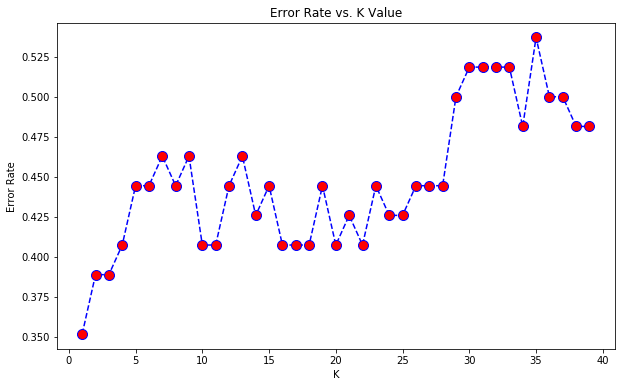

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [35]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[18  4  0]
 [10  8  0]
 [ 4  1  9]]


              precision    recall  f1-score   support

       TM195       0.56      0.82      0.67        22
       TM498       0.62      0.44      0.52        18
       TM798       1.00      0.64      0.78        14

    accuracy                           0.65        54
   macro avg       0.73      0.64      0.66        54
weighted avg       0.69      0.65      0.65        54



It would appear easier to classify a user as a purchaser of the TM798 than it would be to distinguish between the purchasers of TM195 and TM498. Judging from the pairplots, purhcasers of the TM798 appear to have higher incomes and expect to cover more miles during the week. On this basis, it may be possible to differentiate the marketing of this model from the other ones in the same line. There are however only a 180 entries in the dataset, so this model would have to be tested further on larger datasets to draw effective conclusions.